# 基礎教學(with python)-003

+ Masking
+ Computing Histograms
+ Thresholding / Binarizing
+ Edge Detection

# ㄧ、Masking

+ remove the unwanted parts of the image

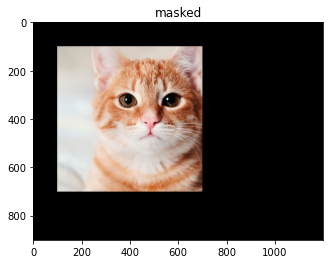

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./cat.jpg')
plt.title('img')
plt.imshow(img[:,:,::-1])

# create mask
blank = np.zeros(img.shape[:2], dtype='uint8')
mask = cv2.rectangle(blank, (100,100), (700,700), 255, -1)
plt.title('mask')
plt.imshow(mask, cmap='gray')

masked = cv2.bitwise_and(img, img, mask=mask)
plt.title('masked')
plt.imshow(masked[:,:,::-1])

# 二、Computing Histograms

+ Visualize the distribution of pixel intensities in an image(計算每個像素值的數量)
+ 影像像素值的分佈與特性
+ cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)
    + 影像：影像來源，需放入list中，例如：[img]
    + 通道：要計算分佈的影像通道，需放入list中。若為灰階影像，則通道就要指定為 [0]，若為彩色影像則可用 [0]、[1] 或 [2] 指定 藍色、綠色或紅色的通道。
    + 遮罩：以遮罩指定要計算的圖形區域，若為 None則會計算整張影像的所有像素。
    + 區間數量：直方圖分隔區間的數量（bins），也就是圖形畫出來要有幾條長方形。
    + 數值範圍：指定要計算的像素值範圍，通常都是設為 [0,256]（計算所有的像素值）。
    
[其他參考資料](https://blog.gtwang.org/programming/python-opencv-matplotlib-plot-histogram-tutorial/)

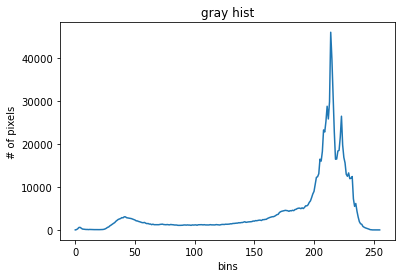

In [4]:
img = cv2.imread('./cat.jpg')

# 先試灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.title('gray hist')
plt.xlabel('bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)

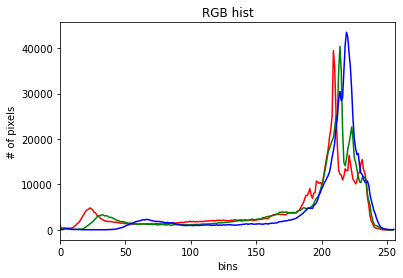

In [17]:
# 畫出 RGB 三種顏色的分佈圖

img = cv2.imread('./cat.jpg')
color = ['r', 'g', 'b']

for i, colr in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = colr)
    plt.xlim([0,256])
    
plt.title('RGB hist')
plt.xlabel('bins')
plt.ylabel('# of pixels')
plt.show()

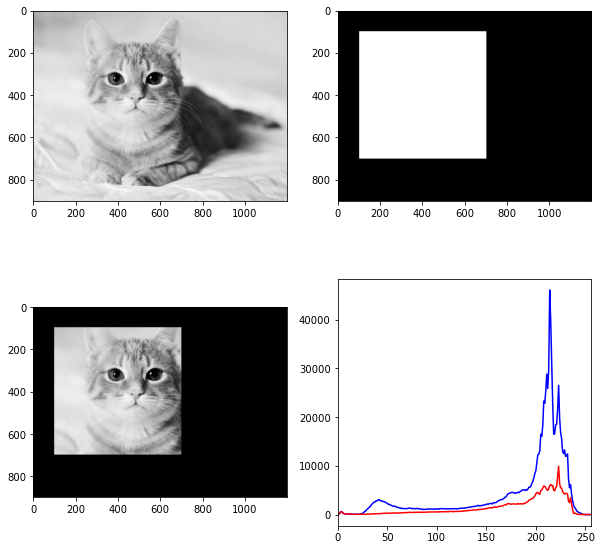

In [26]:
plt.rcParams['figure.figsize'] = (10,10)
# 加上圖像遮罩
# 計算圖形中部份區域的像素值分佈

img = cv2.imread('./cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# create mask
blank = np.zeros(gray.shape, dtype='uint8')
mask = cv2.rectangle(blank, (100,100), (700,700), 255, -1)
masked = cv2.bitwise_and(gray, gray, mask=mask)

# hist
hist_full = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([masked], [0], mask, [256], [0, 256])

plt.subplot(221), plt.imshow(gray, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked, 'gray')
plt.subplot(224), plt.plot(hist_full, color='b'), plt.plot(hist_mask, color='r')
plt.xlim([0, 256])

plt.show()


# 三、Thresholding / Binarizing  

+ Simple Thresholding 
+ Adaptive Thresholding


+ 把影像轉為binaring image(二值化影像)
+ Pixel值為0或255
+ 把每個pixel值與thresholing value進行比較，再轉為0或255


(<matplotlib.axes._subplots.AxesSubplot at 0x7fefa825c640>,
 <matplotlib.image.AxesImage at 0x7fefbee13a90>)

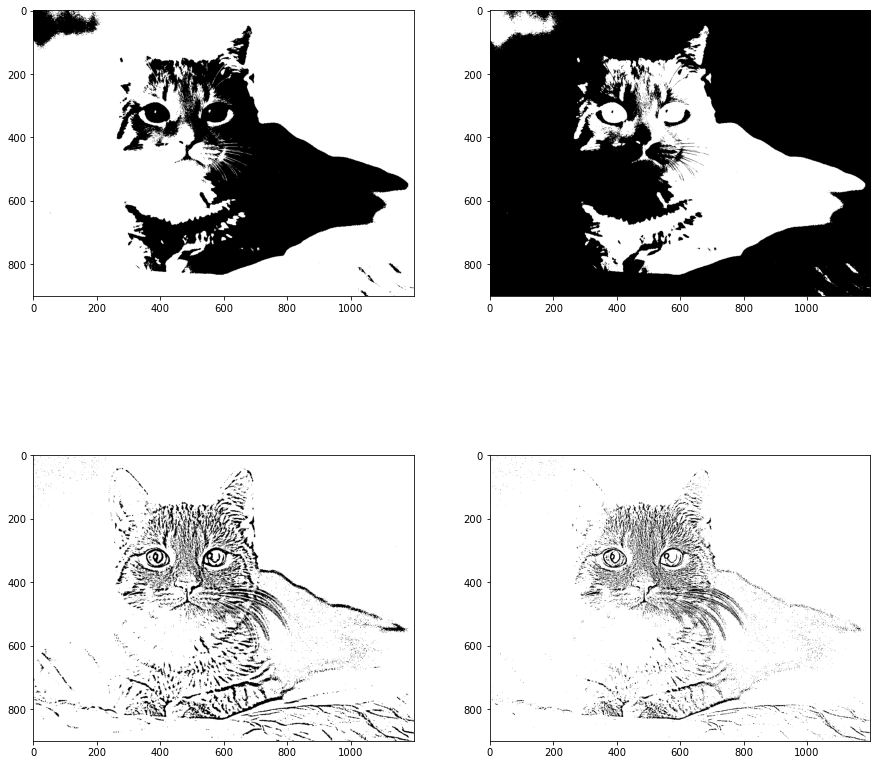

In [65]:
plt.rcParams['figure.figsize'] = (15,15)

img = cv2.imread('./cat.jpg')

#先轉灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')

# simple thresholding
threshold, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.subplot(221), plt.imshow(thresh, 'gray')

threshold, thresh_inv = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)
plt.subplot(222), plt.imshow(thresh_inv, 'gray')

# adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY,13, 5)
plt.subplot(223), plt.imshow(adaptive_thresh, 'gray')

adaptive_thresh_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,13, 5)
plt.subplot(224), plt.imshow(adaptive_thresh_gauss, 'gray')

# 四、Edge Detection

+ Laplacian
    + 使用拉普拉斯運算子進行偵測邊緣
    + cv2.Laplacian(img, ddepth, ksize, scale)
    + ddepth：影像深度，設定 -1 表示使用圖片原本影像深度
    + ksize：運算區域大小，預設 1 ( 必須是正奇數 )
    + scale：縮放比例常數，預設 1 ( 必須是正奇數 )

+ Sobel
    + 使用索伯運算子進行偵測邊緣
    + cv2.Sobel(img, ddepth, dx, dy, ksize, scale)
    + dx：針對 x 軸抓取邊緣
    + dy：針對 y 軸抓取邊緣
    + ddepth：影像深度，設定 -1 表示使用圖片原本影像深度
    + ksize：運算區域大小，預設 1 ( 必須是正奇數 )
    + scale：縮放比例常數，預設 1 ( 必須是正奇數

+ Canny

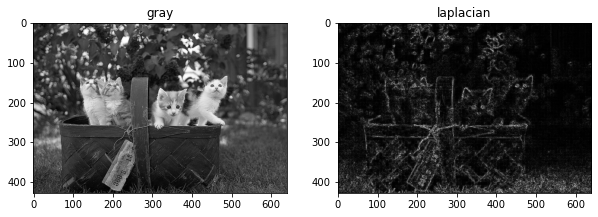

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10,10)

img = cv2.imread('./cats.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.title('gray')
plt.imshow(gray, 'gray')

# laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
plt.subplot(122)
plt.title('laplacian')
plt.imshow(lap, 'gray')

/Users/huangweixiang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:468: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


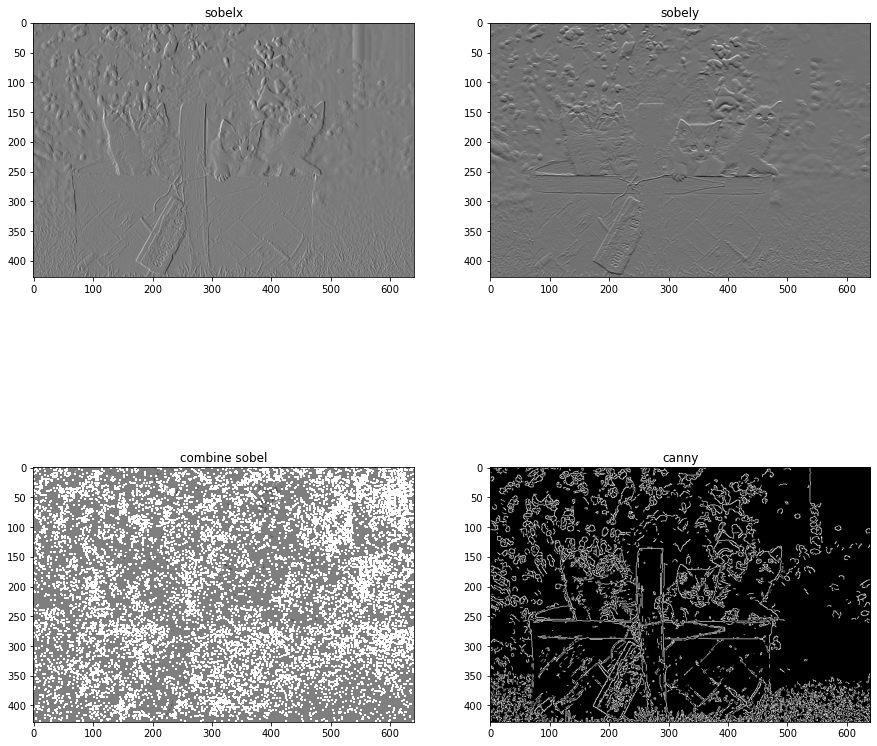

In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

# sobel
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
plt.subplot(221)
plt.title('sobelx')
plt.imshow(sobelx, 'gray')

sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
plt.subplot(222) 
plt.title('sobely')
plt.imshow(sobely, 'gray')

combine = cv2.bitwise_or(sobelx, sobely)
plt.subplot(223) 
plt.title('combine sobel')
plt.imshow(combine, 'gray')

# canny
canny = cv2.Canny(gray, 125, 175)
plt.subplot(224) 
plt.title('canny')
plt.imshow(canny, 'gray')